In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Secyan

In [44]:
data_sizes = ['1MB', '10MB', '100MB','1GB']
query_numbers = [0,1,2,3,4]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"secyan_data/{data_size}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        time = time_col[idx]
        if (time >= 0):
            query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
secyan_dict = {}
for qnum in query_numbers:
    secyan_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(secyan_dict[2][i])

# Returns a data_station_dict with key = query number

{0: defaultdict(<class 'list'>, {}), 1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {}), 4: defaultdict(<class 'list'>, {})}
{0: defaultdict(<class 'list'>, {'1MB': [0.138, 0.144, 0.142]}), 1: defaultdict(<class 'list'>, {'1MB': [0.141, 0.144, 0.146]}), 2: defaultdict(<class 'list'>, {'1MB': [0.275, 0.289, 0.269]}), 3: defaultdict(<class 'list'>, {'1MB': [0.85, 0.862, 0.869]}), 4: defaultdict(<class 'list'>, {'1MB': [8.692, 8.77, 8.629]})}
{0: defaultdict(<class 'list'>, {'1MB': [0.138, 0.144, 0.142]}), 1: defaultdict(<class 'list'>, {'1MB': [0.141, 0.144, 0.146]}), 2: defaultdict(<class 'list'>, {'1MB': [0.275, 0.289, 0.269]}), 3: defaultdict(<class 'list'>, {'1MB': [0.85, 0.862, 0.869]}), 4: defaultdict(<class 'list'>, {'1MB': [8.692, 8.77, 8.629]})}
{0: defaultdict(<class 'list'>, {'1MB': [0.138, 0.144, 0.142], '10MB': [1.156, 1.102, 1.094]}), 1: defaultdict(<class 'list'>, {'1MB': [0.141, 0.144, 0.146], '10MB': [1.097, 1.084, 

# Data Station

In [45]:
data_sizes = ['1MB', '10MB', '100MB','1GB']
query_numbers = [1,2,3,4,5]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = {}
for qnum in query_numbers:
    data_station_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(data_station_dict[2][i])

# Returns a data_station_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {}), 4: defaultdict(<class 'list'>, {}), 5: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6899018287658691, 1.686737298965454, 1.6706793308258057]}), 2: defaultdict(<class 'list'>, {'1MB': [1.6954035758972168, 1.6751596927642822, 1.6704597473144531]}), 3: defaultdict(<class 'list'>, {'1MB': [1.6680192947387695, 1.6669683456420898, 1.6622095108032229]}), 4: defaultdict(<class 'list'>, {'1MB': [1.6811761856079102, 1.6742072105407717, 1.6886889934539795]}), 5: defaultdict(<class 'list'>, {'1MB': [1.6852927207946775, 1.687300682067871, 1.681570053100586]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6899018287658691, 1.686737298965454, 1.6706793308258057]}), 2: defaultdict(<class 'list'>, {'1MB': [1.6954035758972168, 1.6751596927642822, 1.6704597473144531]}), 3: defaultdict(<class 'list'>, {'1MB': [1.6680192947387695, 1.6669683456420898, 1.6622095108032229]}

# Plots

In [46]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(0.138, 0.142, 0.144), (1.094, 1.102, 1.156), (11.0, 11.013, 11.508), (126.639, 128.675, 130.537)]
[(1.6706793308258057, 1.686737298965454, 1.6899018287658691), (1.949019193649292, 1.9504640102386477, 1.9851453304290767), (3.592944622039795, 3.637662410736084, 4.804901361465454), (20.52316355705261, 20.54571032524109, 29.591796875)]
[0.142, 1.102, 11.013, 128.675]


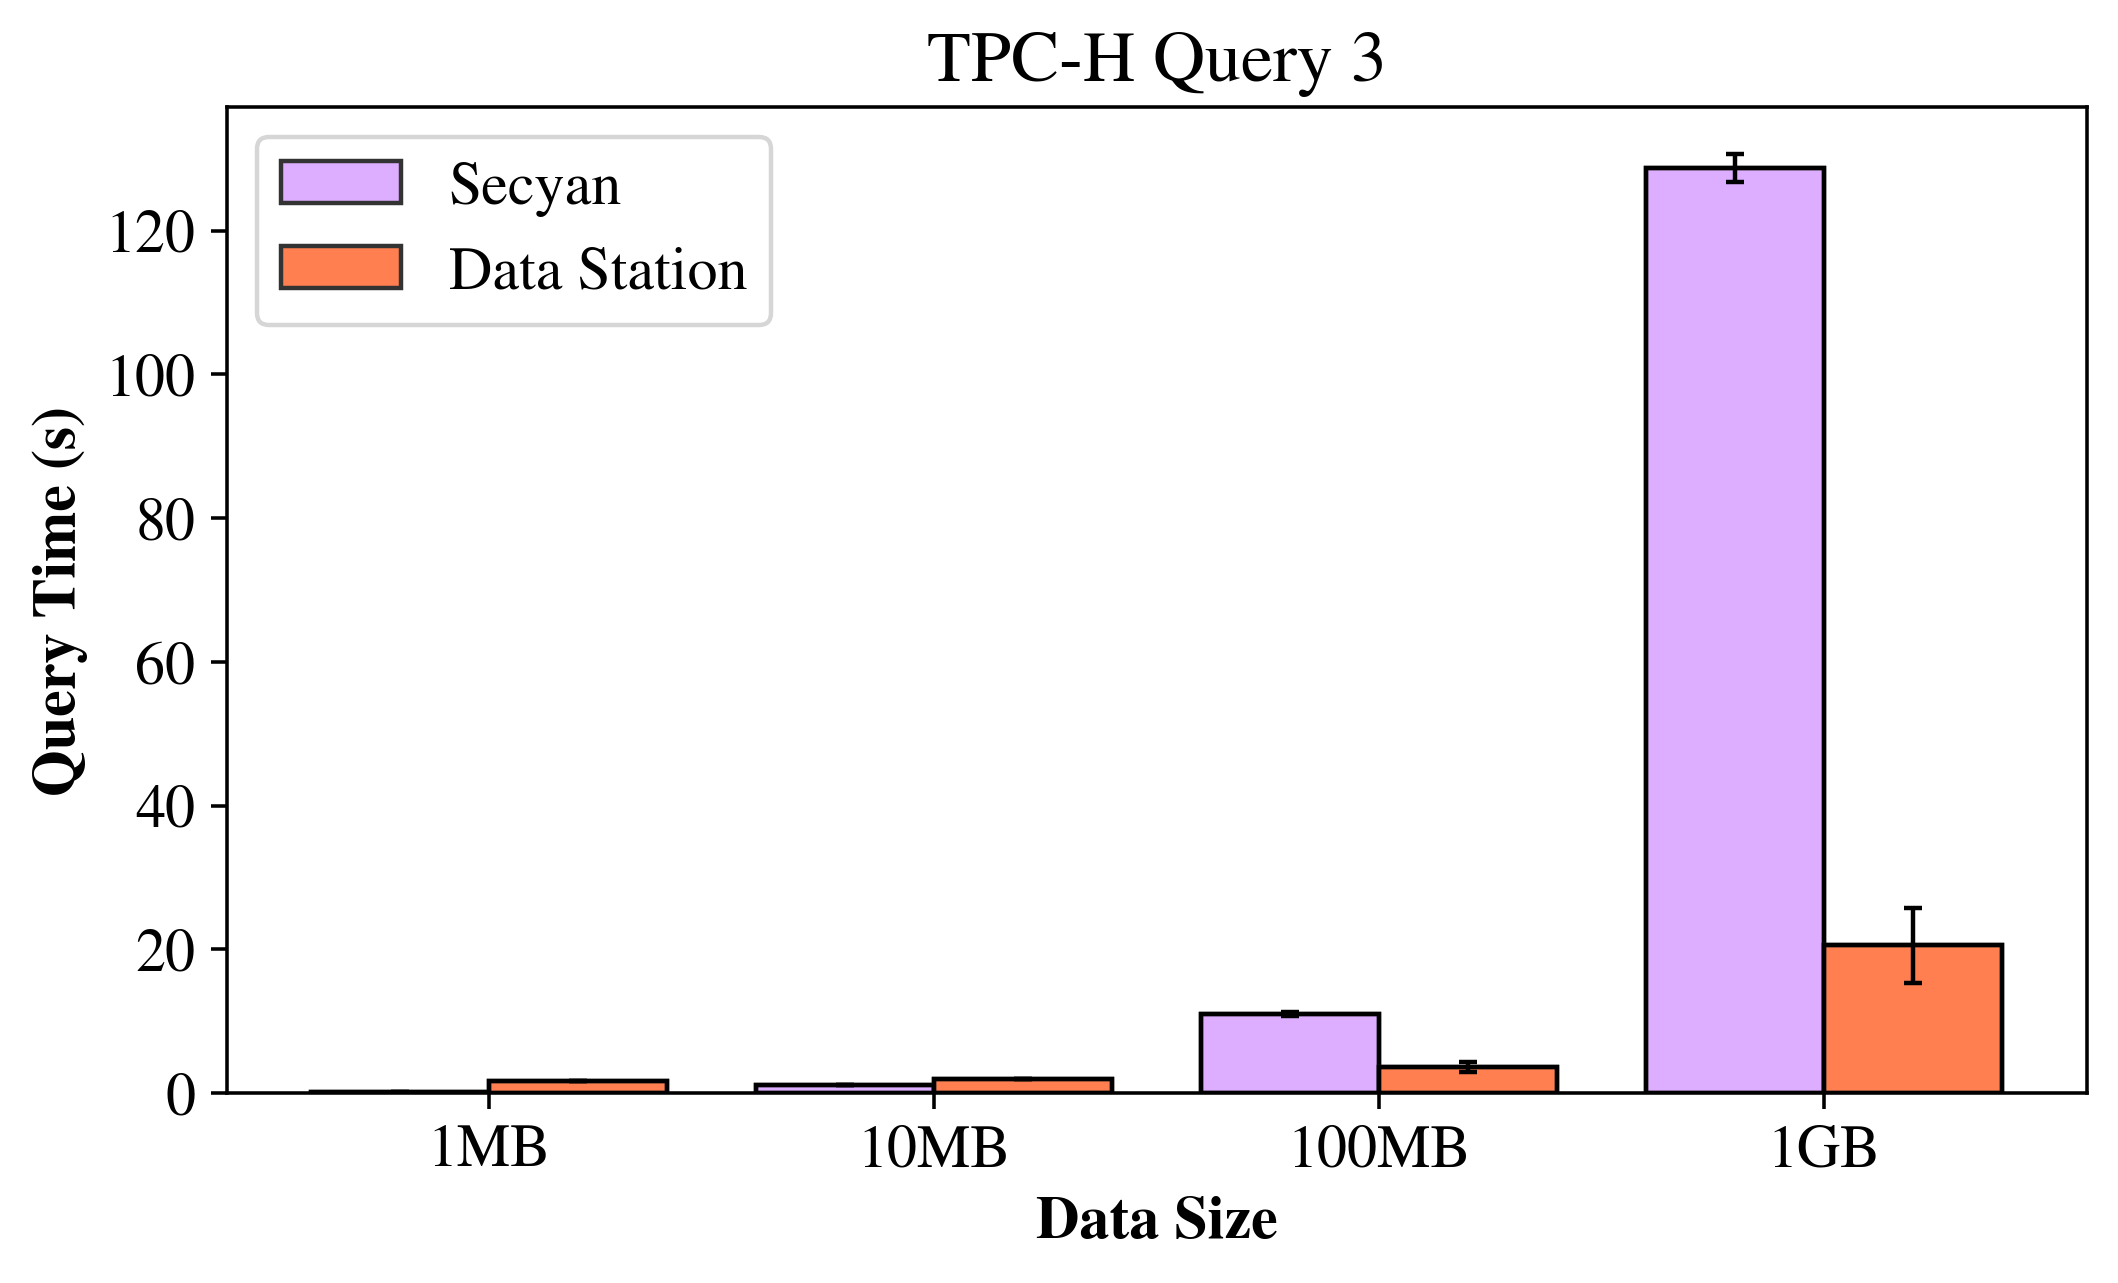

In [47]:
# TPC-H Query 3
data_left = secyan_dict[0]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[1]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

print(medians_left)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#DDAEFF'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# plt.yscale("log")

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("TPC-H Query 3")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q3.pdf", bbox_inches='tight')

plt.show()

[(0.141, 0.144, 0.146), (1.079, 1.084, 1.097), (10.607, 10.716, 11.018), (125.18, 125.215, 126.627)]
[(1.6704597473144531, 1.6751596927642822, 1.6954035758972168), (1.9547386169433596, 1.955009937286377, 1.9624910354614256), (3.639318704605103, 3.665311813354492, 3.6720356941223145), (20.666017293930054, 20.67151951789856, 20.715928077697757)]
[0.144, 1.084, 10.716, 125.215]


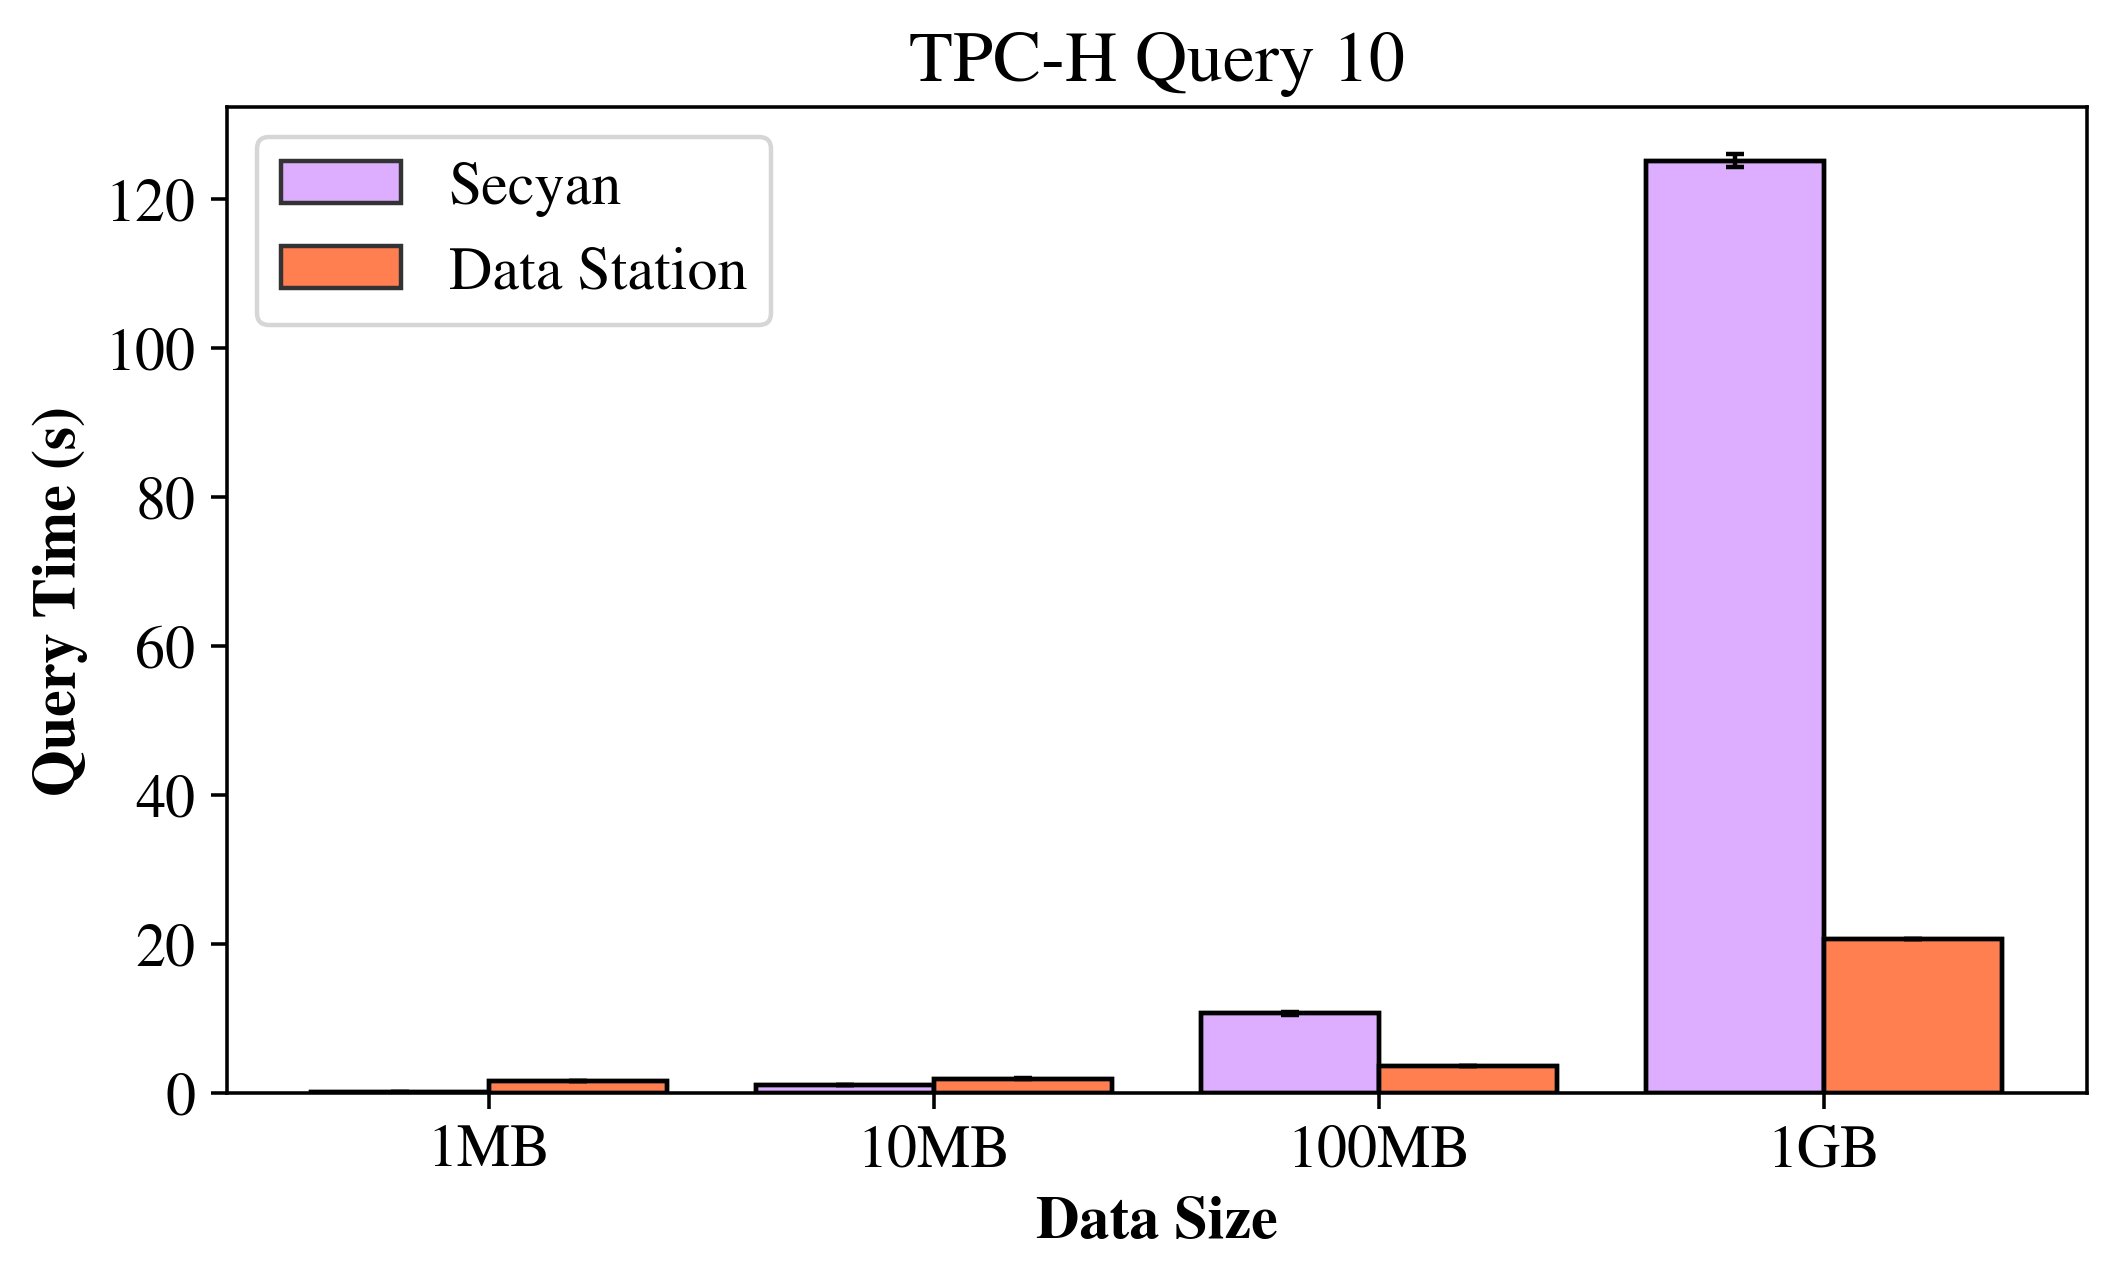

In [48]:
# TPC-H Query 10
data_left = secyan_dict[1]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[2]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#DDAEFF'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# plt.yscale("log")

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("TPC-H Query 10")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q10.pdf", bbox_inches='tight')

plt.show()


[(0.269, 0.275, 0.289), (2.13, 2.146, 2.194), (20.373, 20.437, 20.573), (224.168, 224.919, 227.554)]
[(1.6622095108032229, 1.6669683456420898, 1.6680192947387695), (1.956191062927246, 1.9806838035583496, 1.9807209968566892), (3.664049625396729, 3.677356004714966, 3.694794654846192), (20.665491104125977, 20.80774235725403, 20.809747219085693)]
stdev_left: [0.010263202878893747, 0.033306655991458156, 0.10213716267842925, 1.7782117421724526]
medians_left: [0.275, 2.146, 20.437, 224.919]


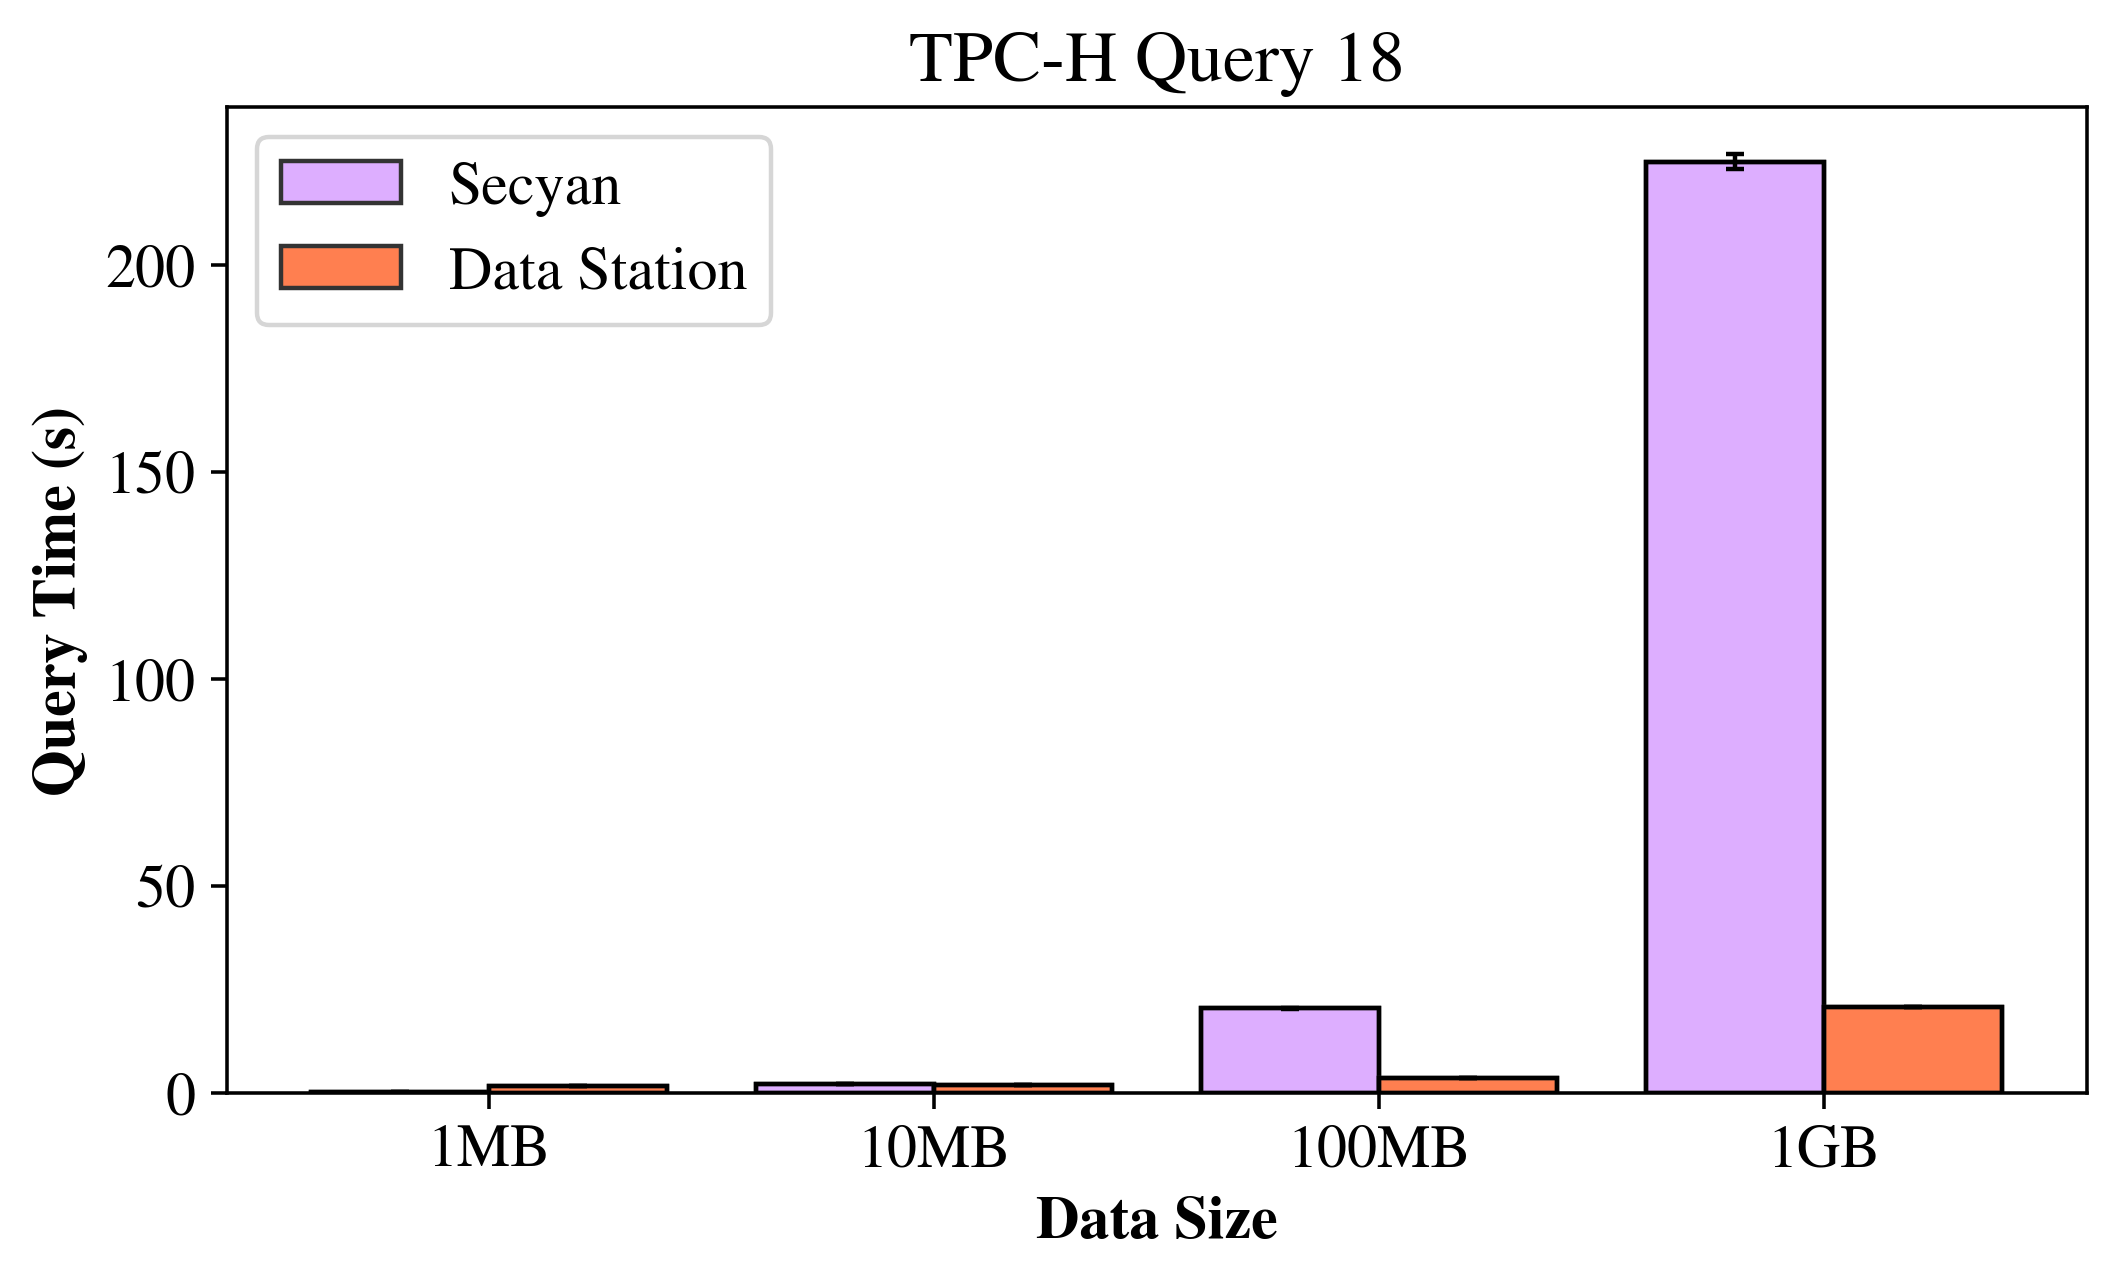

In [49]:
# TPC-H Query 18
data_left = secyan_dict[2]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[3]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print("stdev_left:",stdev_left)
print("medians_left:",medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#DDAEFF'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# plt.yscale("log")

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("TPC-H Query 18")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q18.pdf", bbox_inches='tight')

plt.show()


[(0.85, 0.862, 0.869), (6.787, 6.836, 6.915), (71.312, 71.433, 71.744)]
[(1.6742072105407717, 1.6811761856079102, 1.6886889934539795), (1.995126485824585, 2.0001795291900635, 2.00180721282959), (3.686098575592041, 3.730656862258911, 3.744962692260742), (20.99990129470825, 21.026482582092285, 21.11311507225037)]
[0.862, 6.836, 71.433, nan]
[nan, nan, nan, 0]


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_71831/3630446837.py:73: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_71831/3630446837.py:82: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,


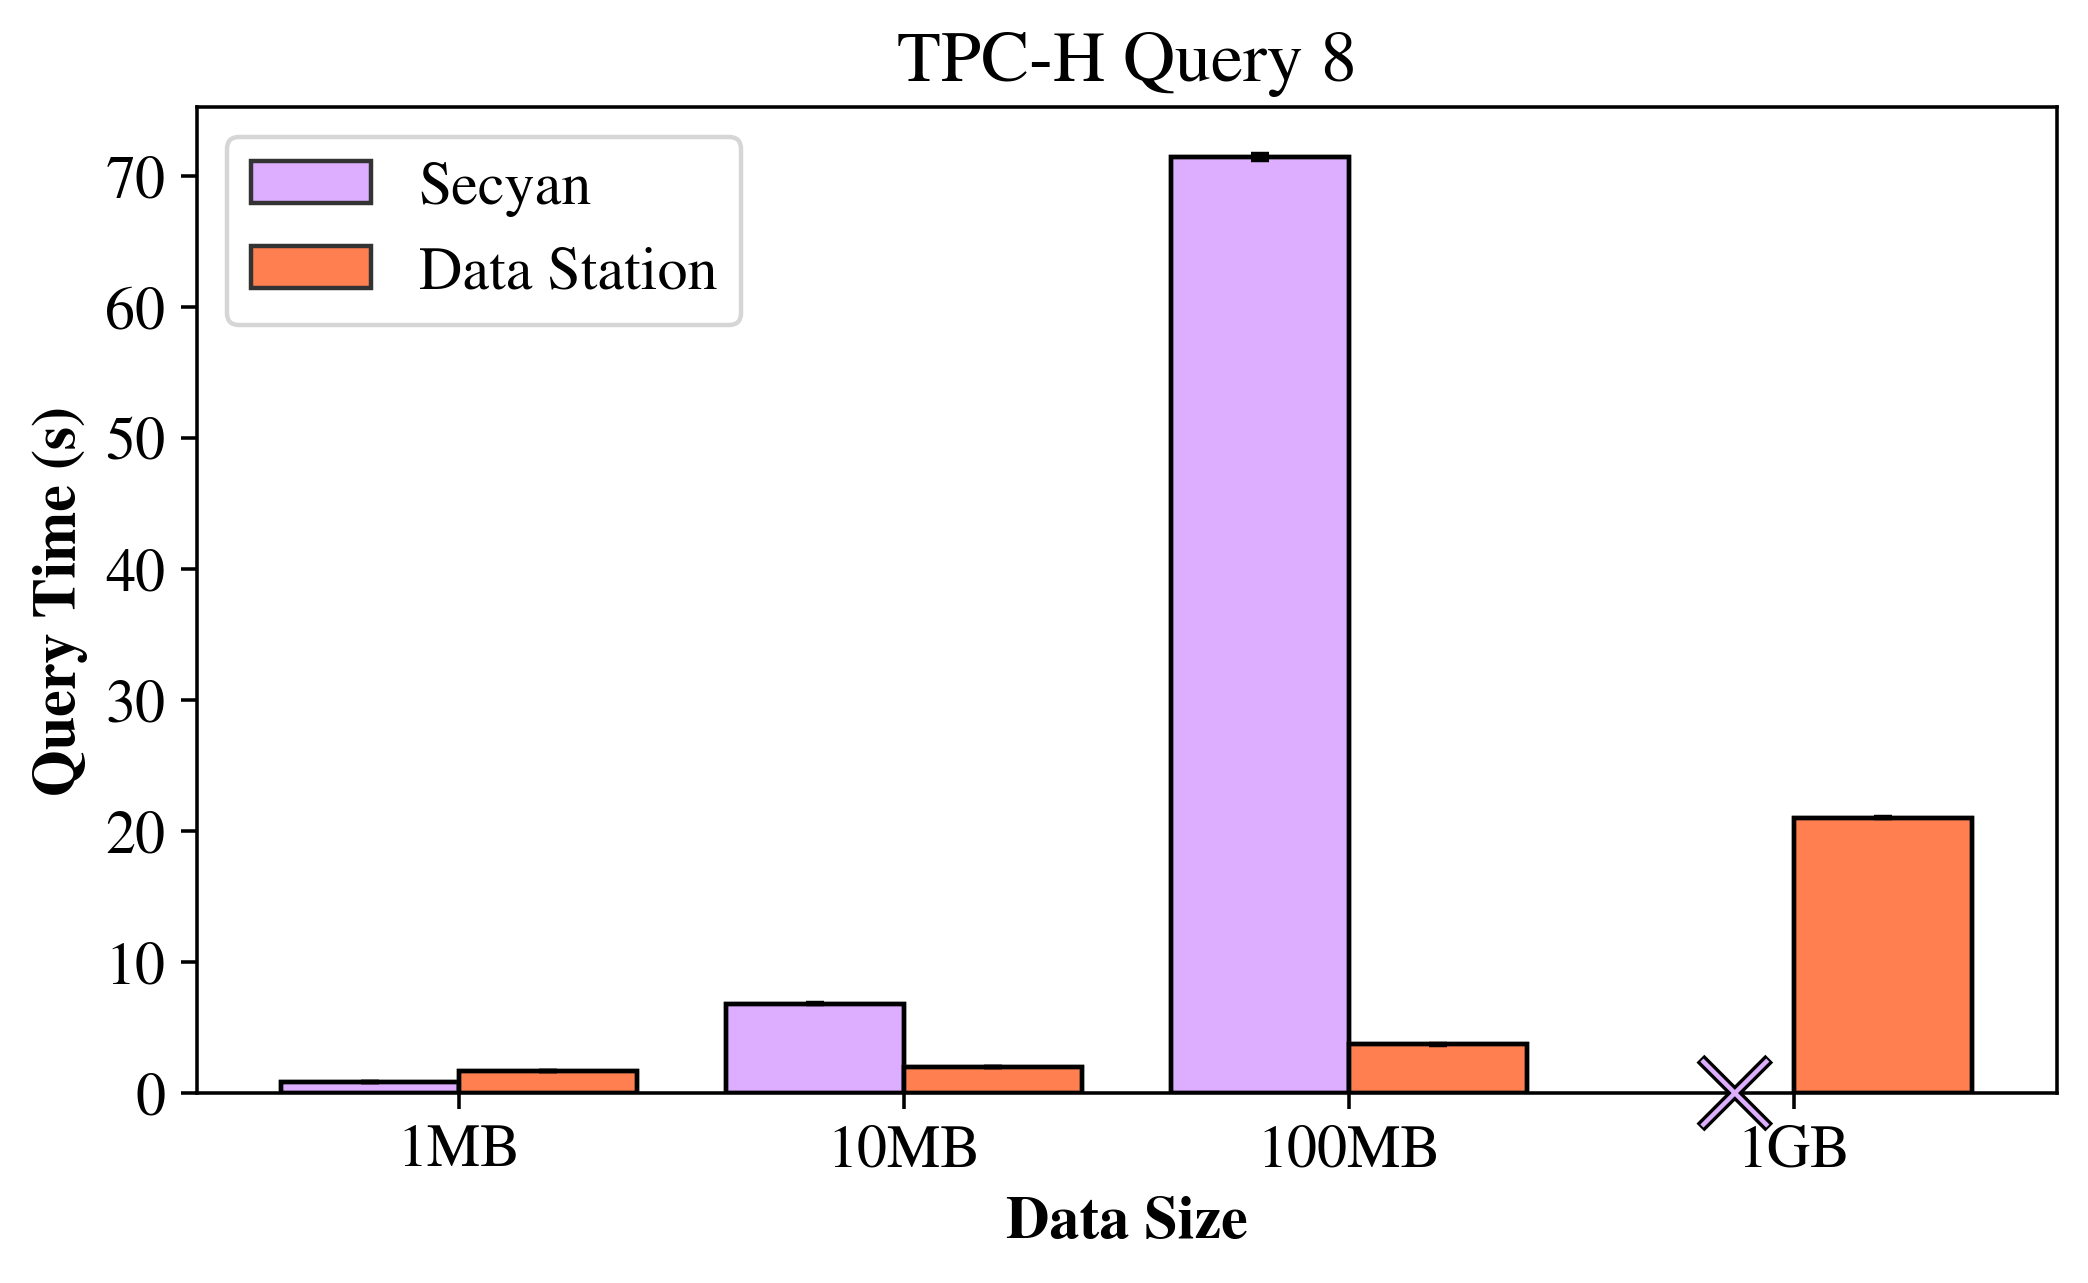

In [50]:
# TPC-H Query 8
data_left = secyan_dict[3]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[4]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

left_x = [float("nan") if not np.isnan(row) else 0 for row in medians_left]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#DDAEFF'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# plt.yscale("log")

print(left_x)
plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,
            edgecolors='black',
            marker='x',
            color = "#DDAEFF",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("TPC-H Query 8")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q8.pdf", bbox_inches='tight')

plt.show()


[(8.629, 8.692, 8.77), (70.661, 70.684, 70.776), (745.922, 748.268, 750.177)]
[(1.681570053100586, 1.6852927207946775, 1.687300682067871), (2.013987302780152, 2.025477409362793, 2.038810968399048), (3.8689253330230713, 3.89555549621582, 3.91439151763916), (22.63638472557068, 22.685197591781616, 22.763584852218628)]
[8.692, 70.684, 748.268, nan]
[nan, nan, nan, 0]


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_71831/684677177.py:108: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_71831/684677177.py:117: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(np.arange(4)+1-width/3,left_x, [220]*4,


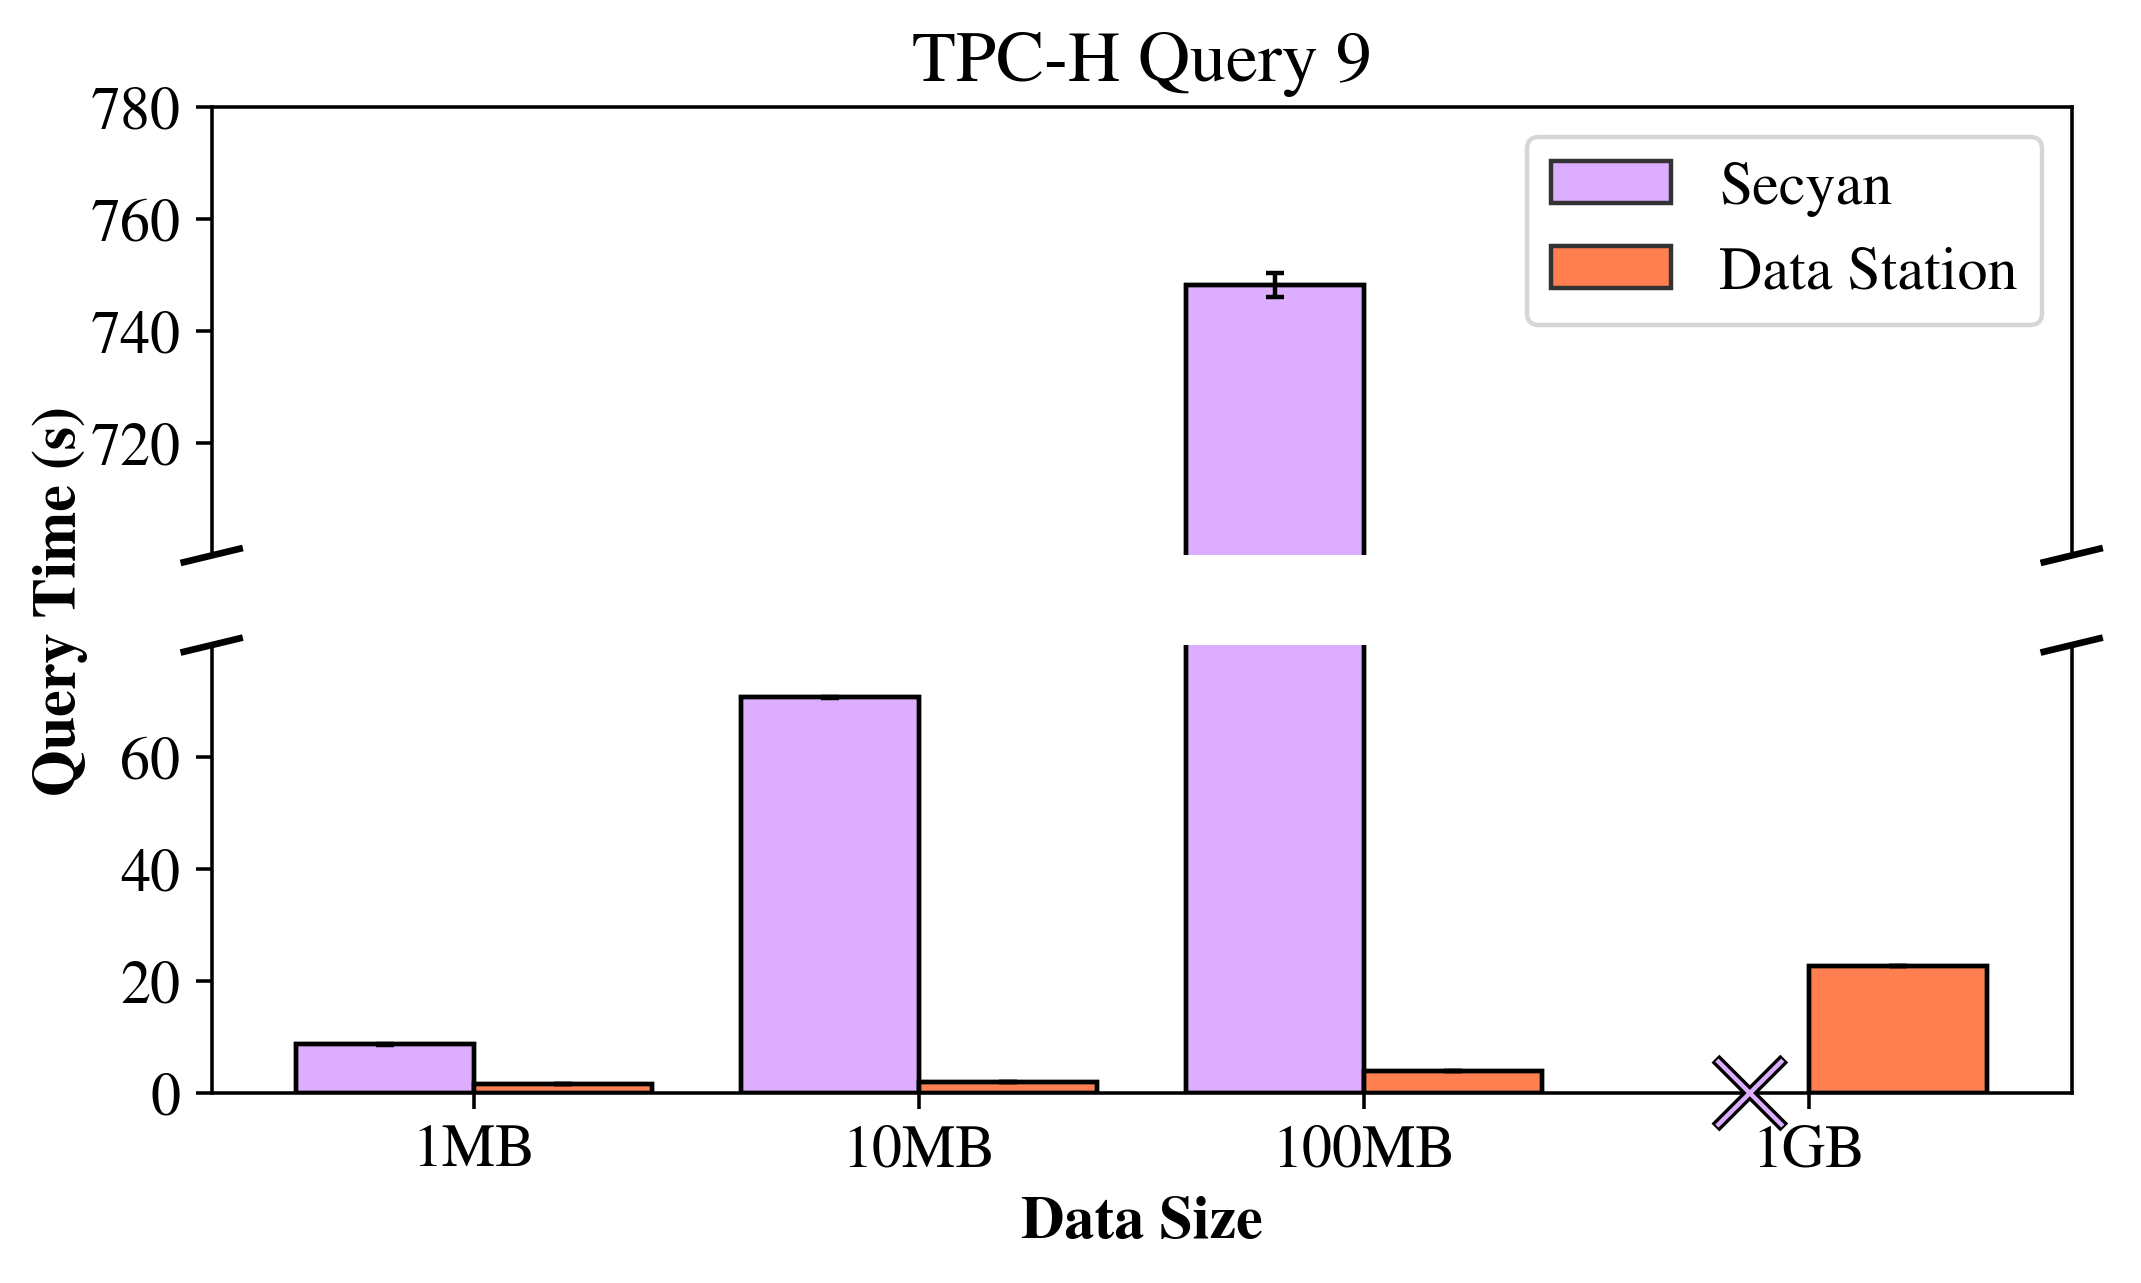

In [51]:
# TPC-H Query 9
data_left = secyan_dict[4]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[5]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

left_x = [float("nan") if not np.isnan(row) else 0 for row in medians_left]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

f = plt.figure(figsize=(7.5,4), dpi=320)

# ax.tick_params(axis='x', labeltop=False, which='both', bottom='off', top='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

ax = f.add_subplot(111)    # The big subplot
ax1 = f.add_subplot(211)    # The big subplot
ax2 = f.add_subplot(212)    # The big subplot
ax1_yticks = np.arange(720,800, 20)
ax2_yticks = np.arange(0,80, 20)
ax1.set_yticks(ax1_yticks)
ax2.set_yticks(ax2_yticks)

ax1.set_ylim(700, 780)
ax2.set_ylim(0, 80)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.tick_params(top=False, bottom=False, right=False)

# plt.figure(figsize=(7.5, 4), dpi=320)
for a in [ax1, ax2]:
    label = "Secyan" if a == ax1 else None
    a.bar(x=X_axis-width/2,width=width,height=medians_left,label=label,
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#DDAEFF'
        )


for a in [ax1, ax2]:
    a.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

for a in [ax1, ax2]:
    label = "Data Station" if a == ax1 else None
    a.bar(x=X_axis+width/2,width=width,height=medians_right,label=label,
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

for a in [ax1, ax2]:
    a.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# plt.yscale("log")

print(left_x)
ax2.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

ax2.scatter(np.arange(4)+1-width/3,left_x, [220]*4,
            edgecolors='black',
            marker='x',
            color = "#DDAEFF",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax.set_xlabel("Data Size", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")

# plt.xlabel("Data Size", fontweight="bold")
# plt.ylabel("Query Time (s)", fontweight="bold")
ax.set_title("TPC-H Query 9")
f.legend(bbox_to_anchor=(0.9, 0.88))

ax1.set_xticks([])
ax2.set_xticks(X_axis, [col.name for col in data_right])

plt.savefig("q9.pdf", bbox_inches='tight')

plt.show()